### 使用batch normalization 和 dropout

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image

from tensorflow.keras.optimizers import SGD

print(tf.__version__)

2.2.0-rc4


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/Jian-Yin-Shine/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 33.49 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [3]:
!ls dog-cat-full-dataset/data/train/cats | grep jpg | wc -l
!ls dog-cat-full-dataset/data/train/dogs | grep jpg | wc -l

10000
10000


In [4]:
!ls dog-cat-full-dataset/data/test/cats | grep jpg | wc -l
!ls dog-cat-full-dataset/data/test/dogs | grep jpg | wc -l

2500
2500


In [0]:
train_dir = '/content/dog-cat-full-dataset/data/train'
test_dir = '/content/dog-cat-full-dataset/data/test'

In [0]:
img_width = 32
img_height = 32
batch_size = 64

In [0]:
datagen = image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = datagen.flow_from_directory(train_dir, 
                                              target_size=(img_width, img_height),
                                              classes=['dogs', 'cats'],
                                              class_mode='binary', 
                                              batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [9]:
val_gen = datagen.flow_from_directory(test_dir, target_size=(img_width, img_height),
                                      classes=['dogs', 'cats'], 
                                      class_mode ='binary',
                                      batch_size = batch_size)

Found 5000 images belonging to 2 classes.


In [10]:
len(train_generator) * batch_size

20032

In [11]:
x, y = next(train_generator)
x.shape, y.shape

((64, 32, 32, 3), (64,))

### 建立模型

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape = (img_width, img_height, 3)))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='binary_crossentropy', metrics=['acc'])

In [14]:
history = model.fit_generator(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=5, 
                    validation_data=val_gen, 
                    validation_steps=len(val_gen))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
313/313 [==============================] - 63s 201ms/step - loss: 0.6818 - acc: 0.5802 - val_loss: 0.6445 - val_acc: 0.6430
Epoch 2/5
313/313 [==============================] - 63s 200ms/step - loss: 0.6215 - acc: 0.6487 - val_loss: 0.5990 - val_acc: 0.6700
Epoch 3/5
313/313 [==============================] - 63s 202ms/step - loss: 0.5722 - acc: 0.7030 - val_loss: 0.5473 - val_acc: 0.7274
Epoch 4/5
313/313 [==============================] - 63s 201ms/step - loss: 0.5178 - acc: 0.7445 - val_loss: 0.5074 - val_acc: 0.7536
Epoch 5/5
313/313 [==============================] - 63s 200ms/step - loss: 0.4803 - acc: 0.7699 - val_loss: 0.5080 - val_acc: 0.7532


In [0]:
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epoch_range = range(1, 6)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

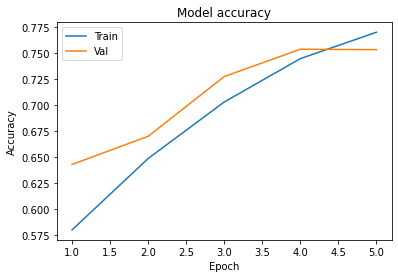

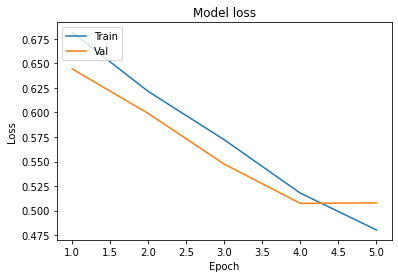

In [16]:
plot_learningCurve(history)

### impliment first 3 blocks of VGG

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape = (img_width, img_height, 3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

In [20]:
history = model.fit_generator(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=5, 
                    validation_data=val_gen, 
                    validation_steps=len(val_gen))

Epoch 1/5
313/313 [==============================] - 63s 201ms/step - loss: 0.6471 - acc: 0.6220 - val_loss: 0.5996 - val_acc: 0.6838
Epoch 2/5
313/313 [==============================] - 63s 201ms/step - loss: 0.5491 - acc: 0.7179 - val_loss: 0.5181 - val_acc: 0.7458
Epoch 3/5
313/313 [==============================] - 62s 199ms/step - loss: 0.4865 - acc: 0.7689 - val_loss: 0.4826 - val_acc: 0.7672
Epoch 4/5
313/313 [==============================] - 62s 199ms/step - loss: 0.4398 - acc: 0.7965 - val_loss: 0.4686 - val_acc: 0.7758
Epoch 5/5
313/313 [==============================] - 62s 198ms/step - loss: 0.3931 - acc: 0.8229 - val_loss: 0.4579 - val_acc: 0.7882


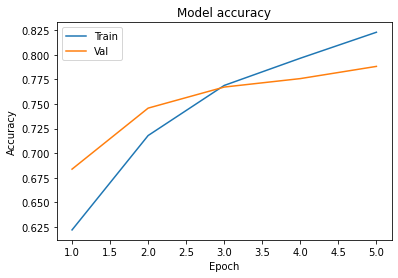

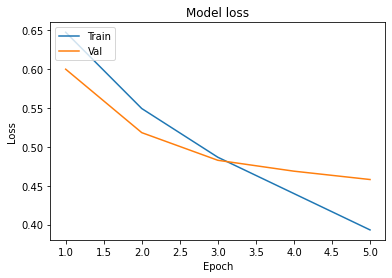

In [21]:
plot_learningCurve(history)

### batch normalization, dropout

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape = (img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

In [25]:
history = model.fit_generator(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=10, 
                    validation_data=val_gen, 
                    validation_steps=len(val_gen))

Epoch 1/10
313/313 [==============================] - 63s 202ms/step - loss: 0.5863 - acc: 0.6924 - val_loss: 0.5550 - val_acc: 0.7100
Epoch 2/10
313/313 [==============================] - 63s 200ms/step - loss: 0.5470 - acc: 0.7238 - val_loss: 0.5322 - val_acc: 0.7208
Epoch 3/10
313/313 [==============================] - 63s 200ms/step - loss: 0.5192 - acc: 0.7430 - val_loss: 0.4797 - val_acc: 0.7624
Epoch 4/10
313/313 [==============================] - 62s 200ms/step - loss: 0.4949 - acc: 0.7589 - val_loss: 0.5540 - val_acc: 0.7114
Epoch 5/10
313/313 [==============================] - 63s 201ms/step - loss: 0.4776 - acc: 0.7724 - val_loss: 0.4466 - val_acc: 0.7884
Epoch 6/10
313/313 [==============================] - 63s 202ms/step - loss: 0.4604 - acc: 0.7844 - val_loss: 0.4685 - val_acc: 0.7682
Epoch 7/10
313/313 [==============================] - 63s 200ms/step - loss: 0.4502 - acc: 0.7896 - val_loss: 0.4586 - val_acc: 0.7808
Epoch 8/10
313/313 [==============================] - 6

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

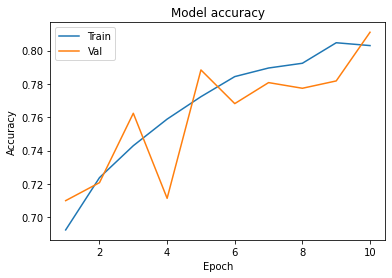

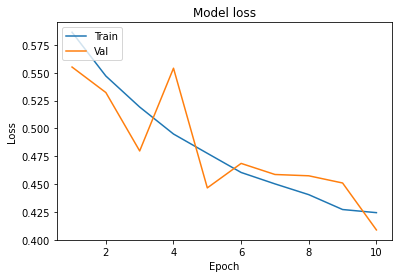

In [28]:
plot_learningCurve(history, 10)